# Audio Spectrum Analysis
This notebook demonstrates how to load an audio file and create spectral visualizations using Python libraries.

In [1]:
# Import required libraries
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio
%matplotlib inline

## Load and Play Audio File
First, we'll load the audio file and enable playback within the notebook.

In [6]:
# Load the audio file
# Replace 'your_audio_file.mp3' with your audio file path
file_path = 'sweet n sour.mp3'
y, sr = librosa.load(file_path)

# Display audio player
Audio(file_path)

## Waveform Visualization
Let's start by plotting the waveform of the audio signal.

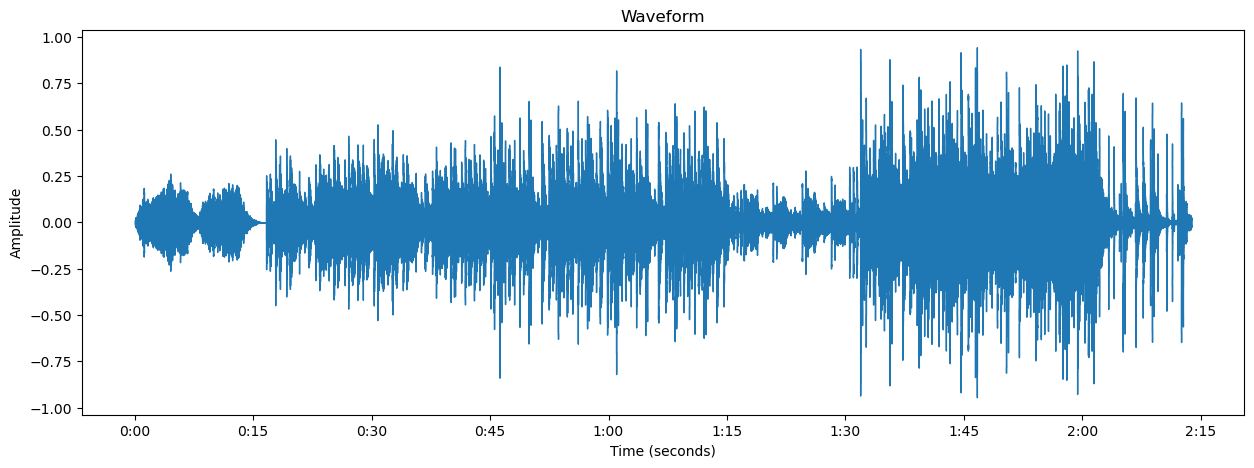

In [7]:
plt.figure(figsize=(15, 5))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

## Spectrogram Analysis
Now we'll create a spectrogram to visualize the frequency content over time.

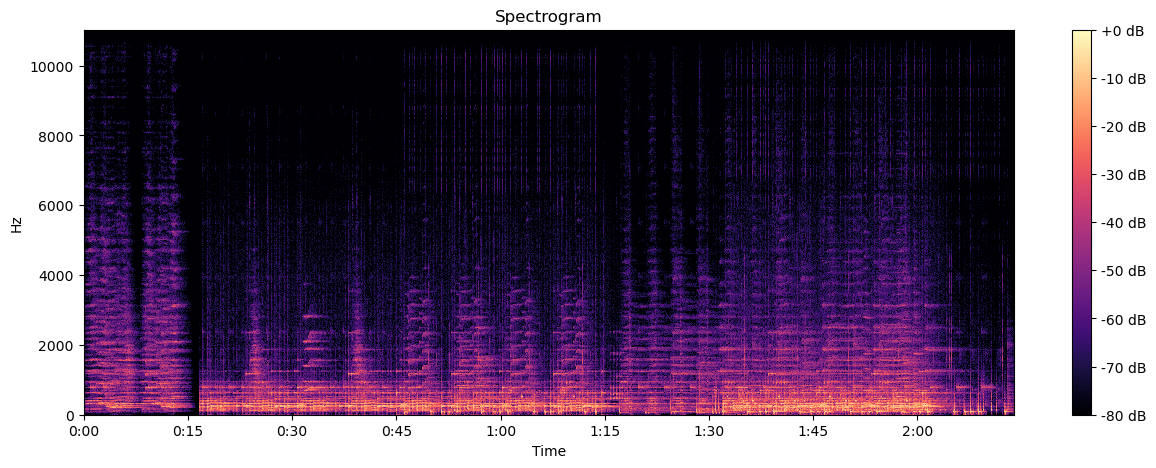

In [8]:
# Compute the spectrogram
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(15, 5))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

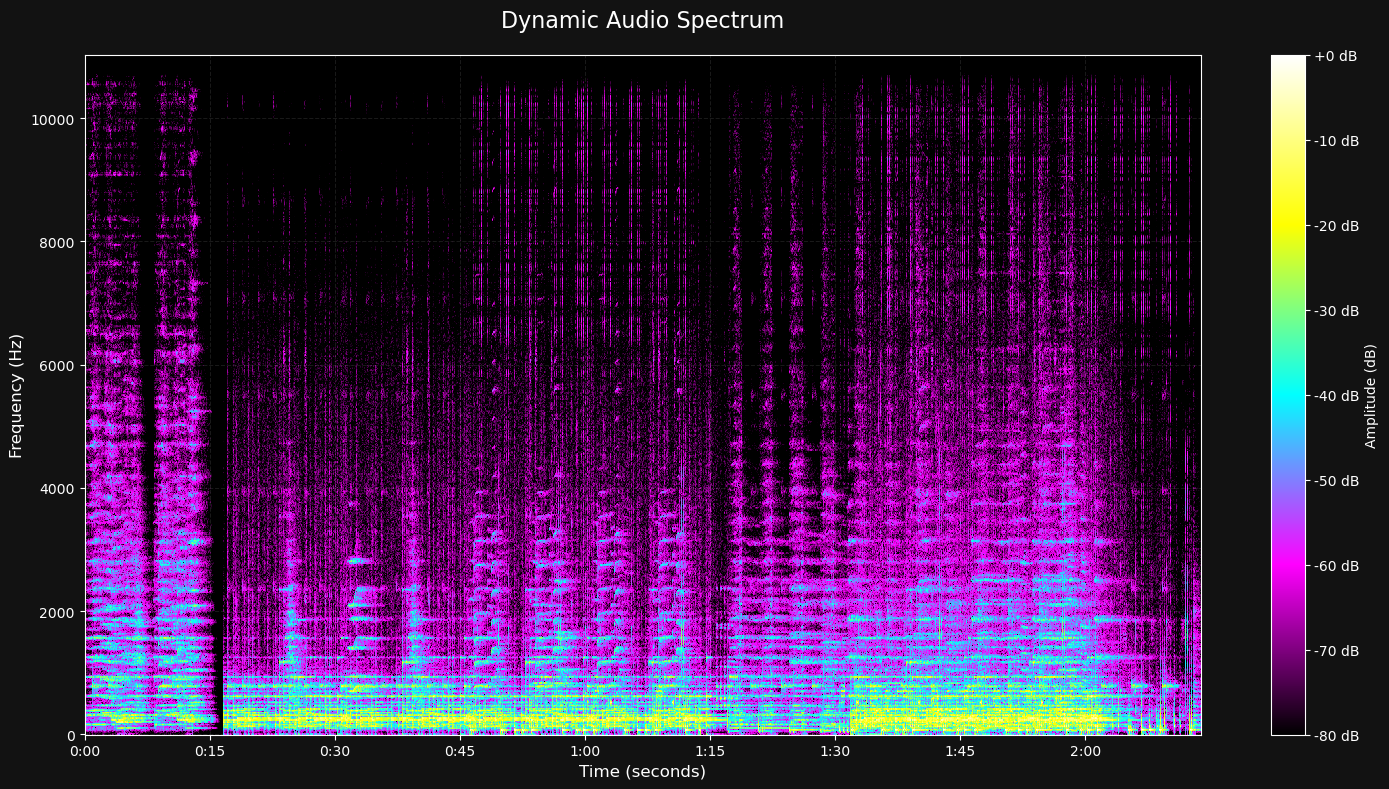

In [12]:
# Compute the spectrogram
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Create a more vibrant colormap
from matplotlib.colors import LinearSegmentedColormap
colors = ['#000000', '#FF00FF', '#00FFFF', '#FFFF00', '#FFFFFF']  # Black -> Magenta -> Cyan -> Yellow -> White
n_bins = 1000  # More bins for smoother gradient
custom_cmap = LinearSegmentedColormap.from_list('custom', colors, N=n_bins)

# Set up the plot with a dark background
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(15, 8))
fig.patch.set_facecolor('#121212')
ax.set_facecolor('#121212')

# Plot the spectrogram with enhanced visual features
img = librosa.display.specshow(
    S_db, 
    sr=sr, 
    x_axis='time', 
    y_axis='hz',
    cmap=custom_cmap,
    ax=ax
)

# Add a glowing effect using multiple layers
for i in range(3):
    librosa.display.specshow(
        S_db,
        sr=sr,
        x_axis='time',
        y_axis='hz',
        cmap=custom_cmap,
        alpha=0.1 * (3-i),
        ax=ax
    )

# Customize colorbar
cbar = plt.colorbar(img, format='%+2.0f dB')
cbar.ax.yaxis.set_tick_params(color='white')
cbar.ax.set_ylabel('Amplitude (dB)', color='white')

# Enhance title and labels
plt.title('Dynamic Audio Spectrum', color='white', fontsize=16, pad=20)
ax.set_xlabel('Time (seconds)', color='white', fontsize=12)
ax.set_ylabel('Frequency (Hz)', color='white', fontsize=12)

# Style the ticks
ax.tick_params(colors='white')
for spine in ax.spines.values():
    spine.set_color('white')

# Add grid for better readability
ax.grid(True, color='white', alpha=0.1, linestyle='--')

# Adjust layout and display
plt.tight_layout()
plt.show()

## Mel Spectrogram
We'll also create a mel spectrogram, which better represents how humans perceive sound frequencies.

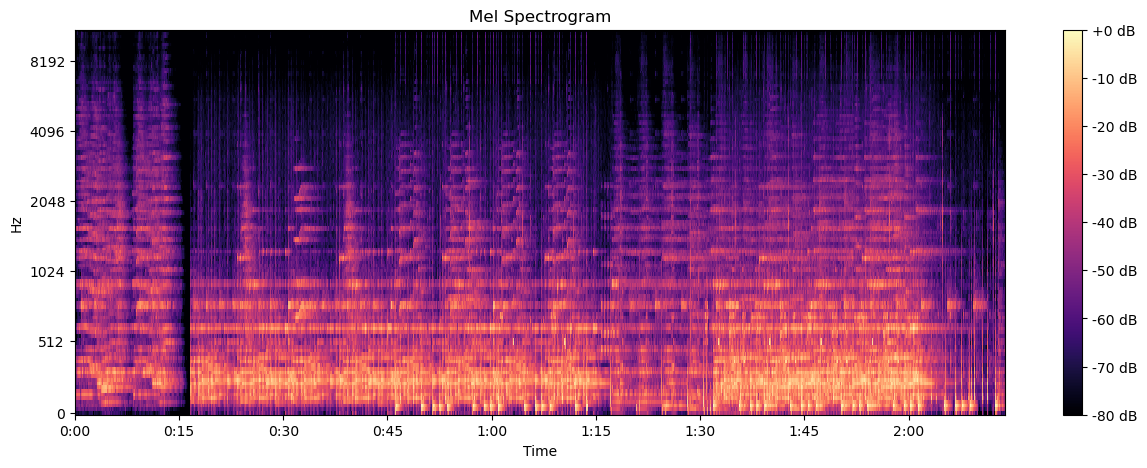

In [9]:
# Compute mel spectrogram
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr)
mel_db = librosa.power_to_db(mel_spect, ref=np.max)

# Plot mel spectrogram
plt.figure(figsize=(15, 5))
librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()

## Chromagram
Finally, let's create a chromagram to visualize the distribution of pitch classes.

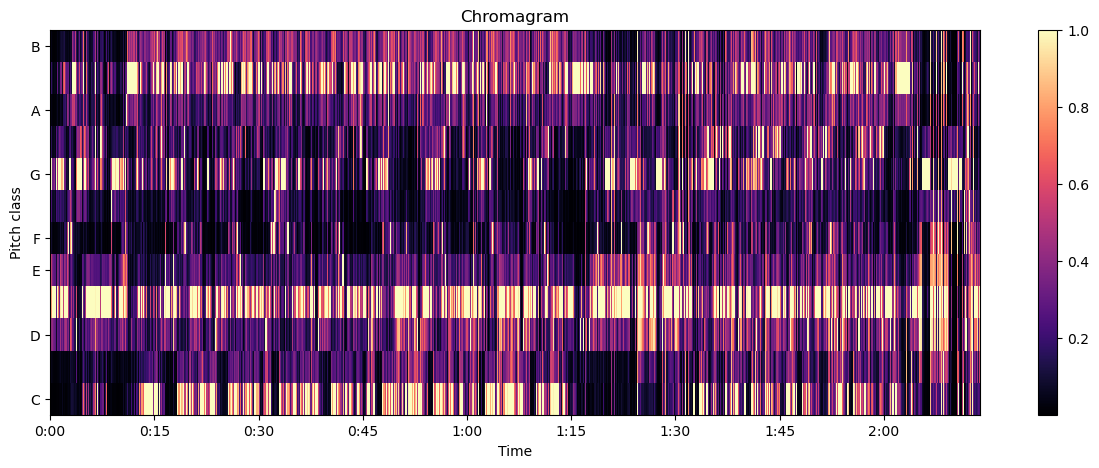

In [10]:
# Compute and display chromagram
chroma = librosa.feature.chroma_stft(y=y, sr=sr)

plt.figure(figsize=(15, 5))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.show()

## Additional Analysis Functions
Here are some utility functions for more detailed analysis.

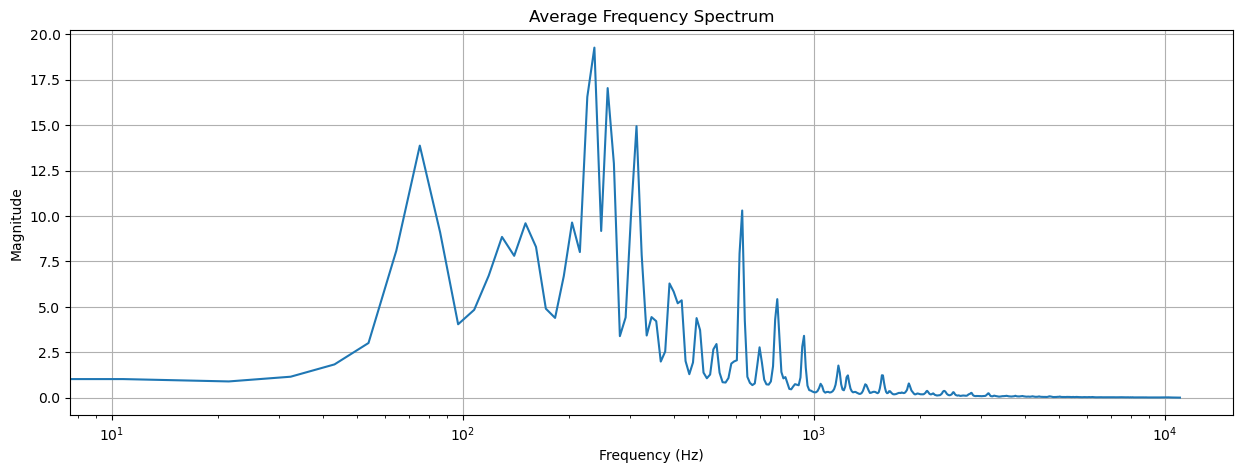

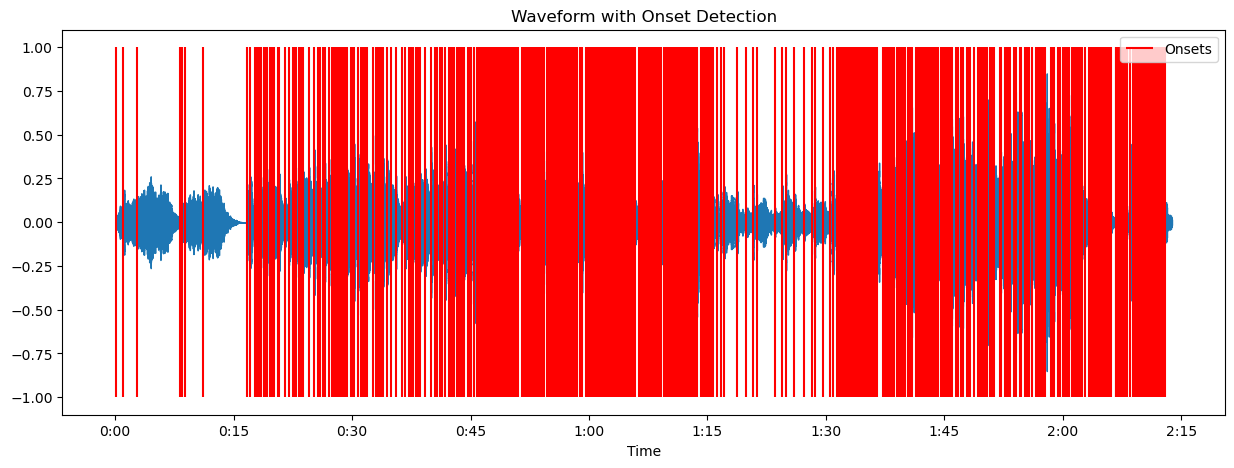

In [11]:
def analyze_frequency_content(y, sr):
    """Analyze the frequency content of the audio file"""
    # Compute FFT
    D = np.abs(librosa.stft(y))
    
    # Get frequency bins
    freqs = librosa.fft_frequencies(sr=sr)
    
    # Calculate average magnitude for each frequency
    avg_magnitude = np.mean(D, axis=1)
    
    # Plot frequency spectrum
    plt.figure(figsize=(15, 5))
    plt.semilogx(freqs, avg_magnitude)
    plt.grid(True)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.title('Average Frequency Spectrum')
    plt.show()

def detect_onsets(y, sr):
    """Detect and visualize onset events in the audio"""
    # Get onset frames
    onset_frames = librosa.onset.onset_detect(y=y, sr=sr)
    onset_times = librosa.frames_to_time(onset_frames, sr=sr)
    
    # Plot waveform with onset markers
    plt.figure(figsize=(15, 5))
    librosa.display.waveshow(y, sr=sr)
    plt.vlines(onset_times, -1, 1, color='r', label='Onsets')
    plt.legend()
    plt.title('Waveform with Onset Detection')
    plt.show()

# Example usage of the analysis functions
analyze_frequency_content(y, sr)
detect_onsets(y, sr)